<a href="https://colab.research.google.com/github/pashadwm/BelajarBanyak2/blob/master/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-01-13 22:46:55--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.05s   

2023-01-13 22:46:56 (106 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
# tambahkan ketika hasil akhir masuk kata yang tidak seharusnya muncul
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'new', 'year',
})

In [ ]:
df = pd.read_csv('bbc_text_cls.csv')
df # .head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [26]:
vectorizer = CountVectorizer(stop_words=stops)
vectorizer

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'also', 'am', 'an', 'and', 'any',
                            'are', 'aren', "aren't", 'as', 'at', 'be',
                            'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'but', 'by', 'can', 'could', ...})

In [27]:
X = vectorizer.fit_transform(df['text'])
X

<2225x29270 sparse matrix of type '<class 'numpy.int64'>'
	with 340920 stored elements in Compressed Sparse Row format>

In [ ]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

# Latent Dirichlet Allocation

In [43]:
lda = LatentDirichletAllocation(
    n_components=10,
    random_state=12345,
)

In [44]:
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [45]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
      ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

In [46]:
# disposables
for topic_idx, topic in enumerate(lda.components_):
  print(topic.argsort()[: -12 - 1 : -1])
  # topic
len(vectorizer.get_feature_names_out())

[19645 17494 26144 17887 19857  8301 27785 18762 23624 19860 18164 27254]
[27776  3417  6366 16663 10802 22965 15501   475 12273 18698 29183 23754]
[12064 27776  9226  9233 28941  7068     1 12273 29114  7069 16663 13847]
[27178 19645  4641 23395 28047 28475 18164  4749 27794 23941 27776 26547]
[15555 16151 12064  3950 20199 13126  7089 22479 16152 23436 15667 26977]
[27776 18500 26449 22965 27254  5616 17887  3394 15501  2114 26547 28507]
[10699  3868 28941 10808 15501  3197 27776 28741 29114  3194 26547  4624]
[24491 27776 28133 19645 16419 23455 17233  2546 24648 27794 24162 16594]
[15360  9356 19645 19415  4052 12064  4699 17354 13289 20612 26091 20945]
[11524  9646 11535 20076 26547 20068 28293 24008 10808 12437  3249 24175]


29270

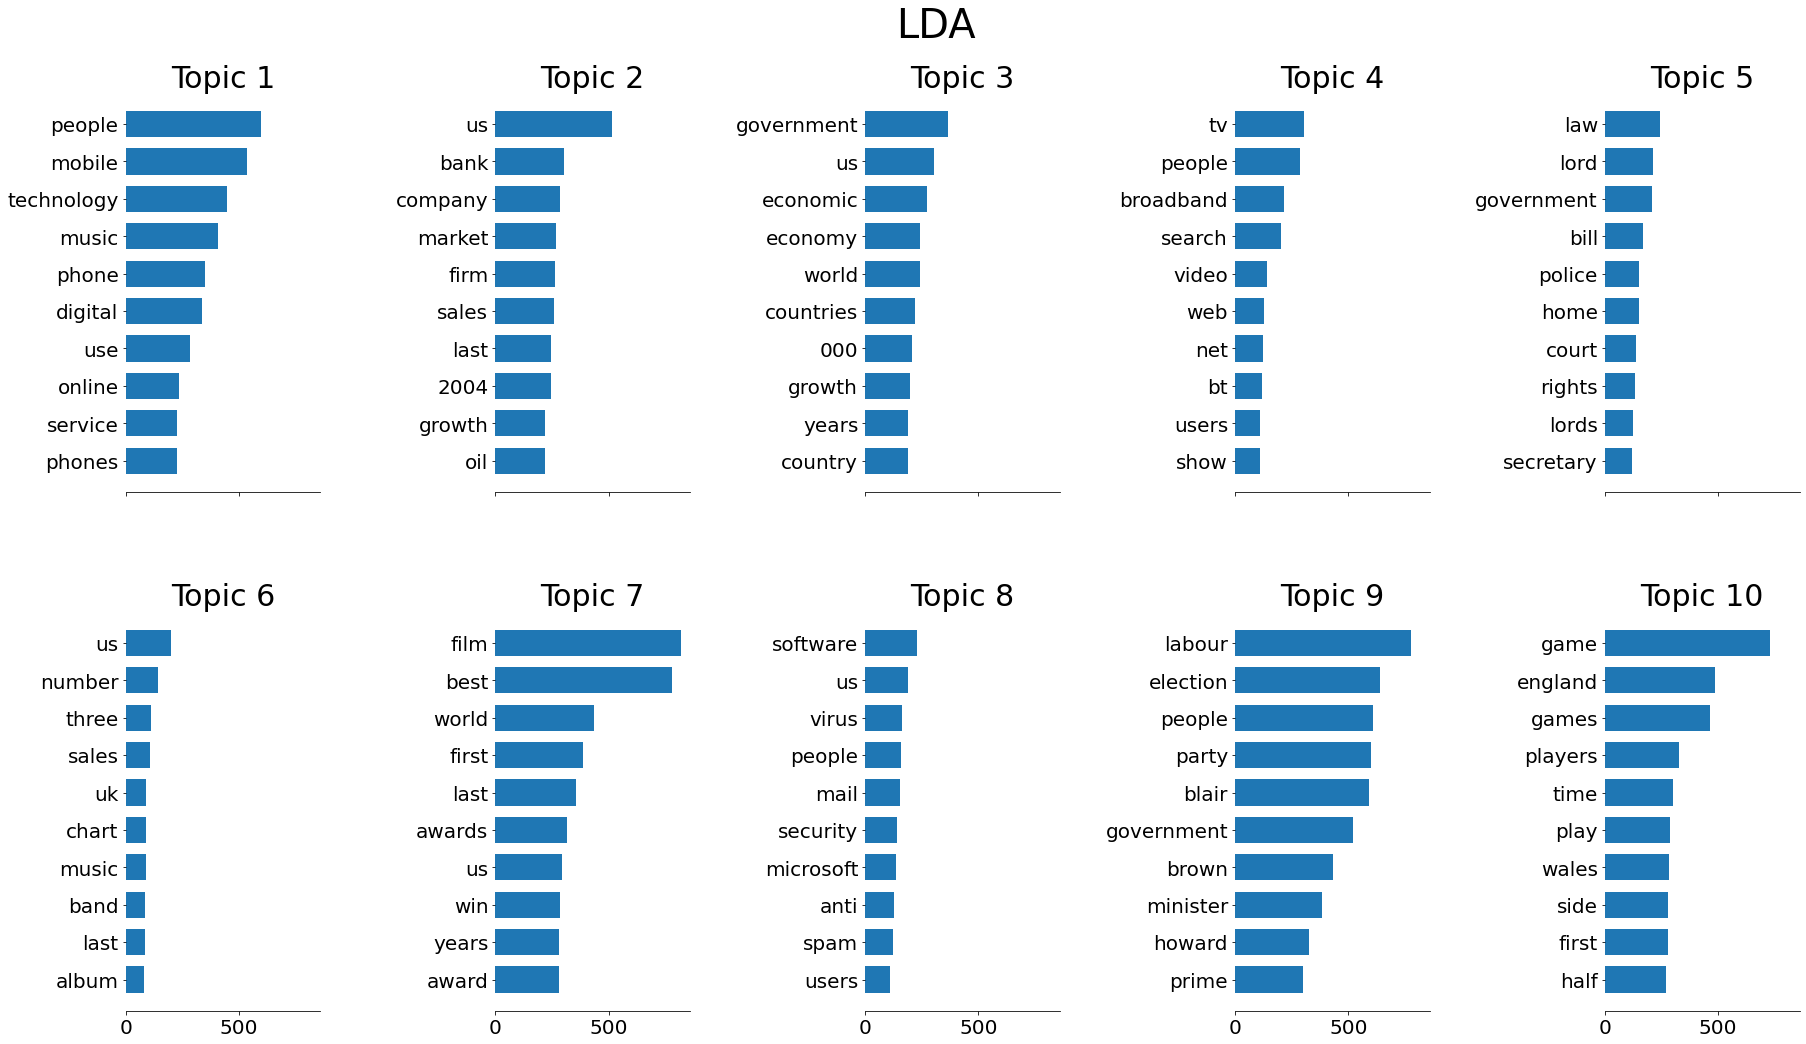

In [47]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names)

In [ ]:
Z = lda.transform(X)

Text(0.5, 1.0, 'True label: sport')

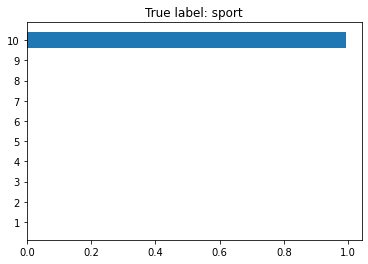

In [ ]:
np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [ ]:
print(wrap(df.iloc[i]['text']))
# z

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

array([8.33430458e-04, 8.33590488e-04, 8.33517715e-04, 8.33434804e-04,
       8.33433754e-04, 8.33439333e-04, 8.33452430e-04, 8.33403929e-04,
       8.33444336e-04, 9.92498853e-01])

# Non-negative Matrix Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(
    n_components=10,
    beta_loss="kullback-leibler",
    solver='mu',
    # alpha_W=0.1,
    # alpha_H=0.1,
    # l1_ratio=0.5,
    random_state=0,
)

In [ ]:
nmf.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [ ]:
def plot_top_words2(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
      ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

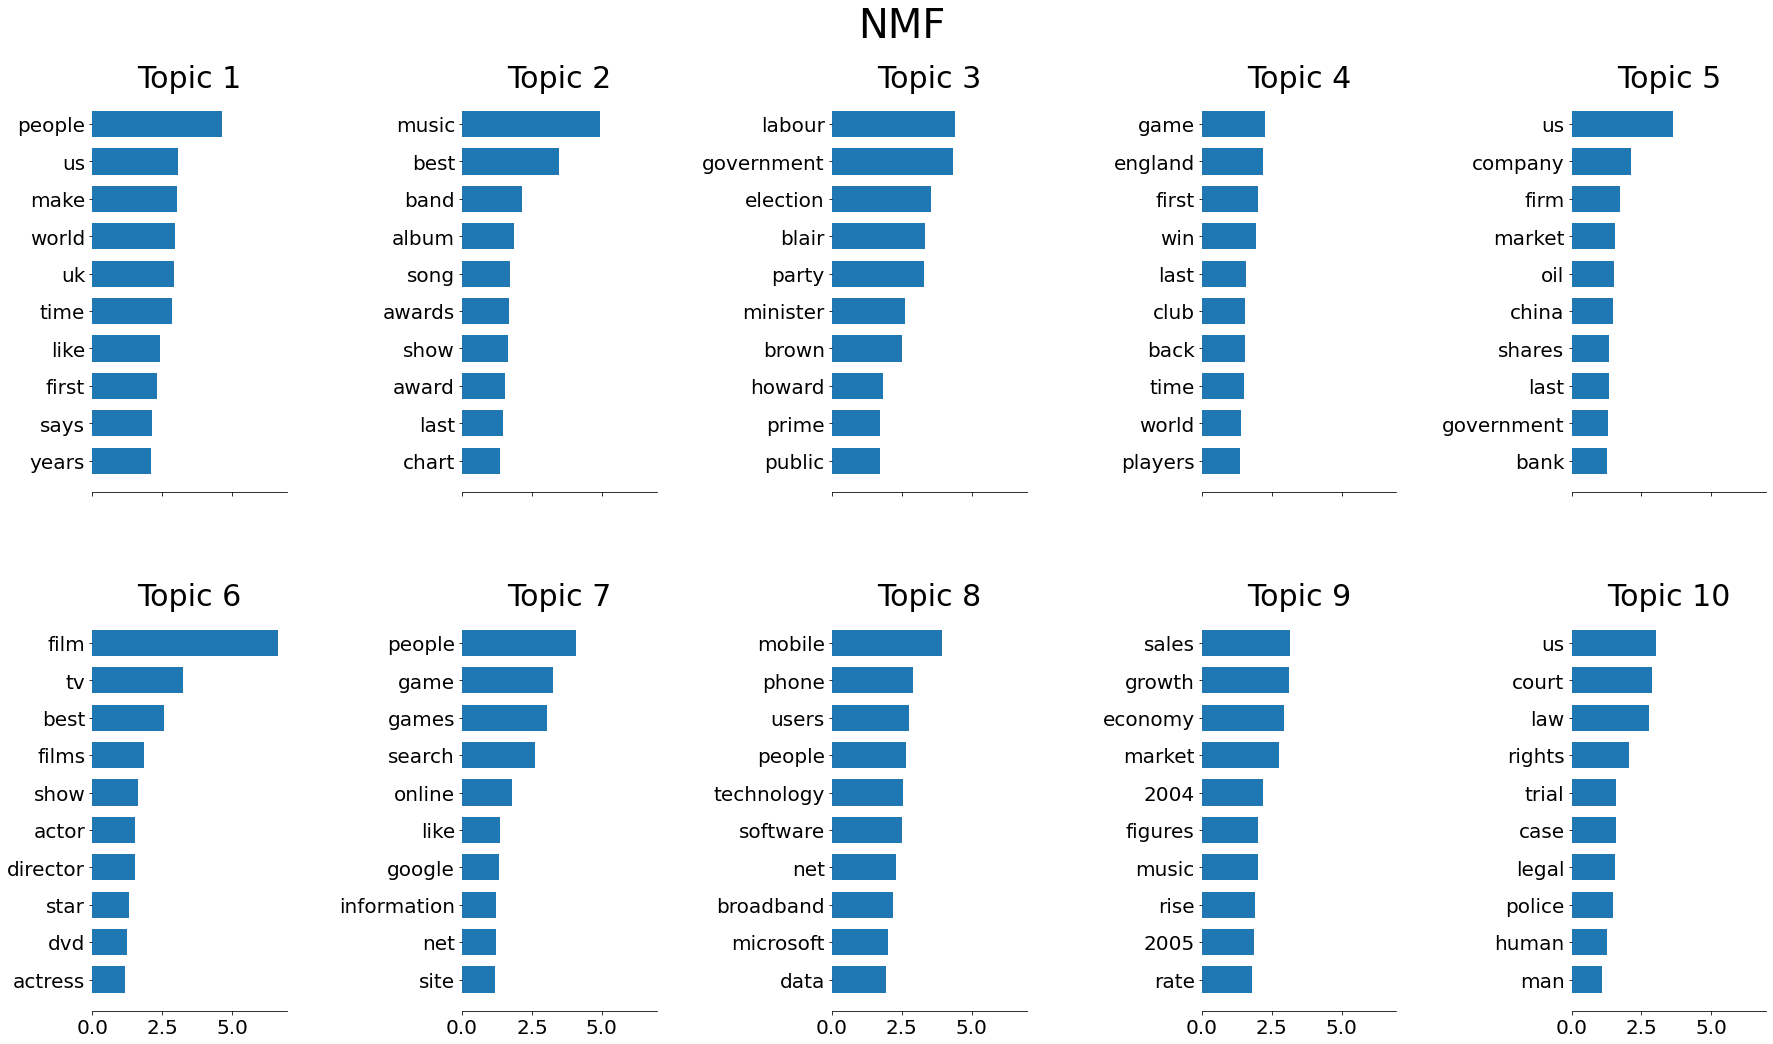

In [ ]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words2(nmf, feature_names)

In [ ]:
Z2 = nmf.transform(X)

Text(0.5, 1.0, 'True label: sport')

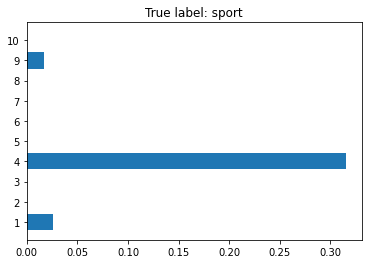

In [ ]:
np.random.seed(0)
i2 = np.random.choice(len(df))
z2 = Z2[i2]
topics2 = np.arange(10) + 1

fig2, ax2 = plt.subplots()
ax2.barh(topics2, z2)
ax2.set_yticks(topics2)
ax2.set_title('True label: %s' % df.iloc[i2]['labels'])

In [ ]:
print(wrap(df.iloc[i2]['text']))
# z2

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20

# Repeat for another document

835

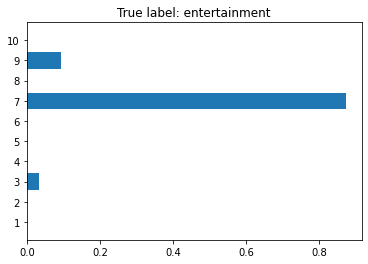

In [ ]:
i = np.random.choice(len(df))
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])
i

In [ ]:
print(wrap(df.iloc[i]['text']))
z

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20

array([2.86589789e-04, 2.86589649e-04, 3.22714416e-02, 2.86588941e-04,
       2.86619110e-04, 2.86582808e-04, 8.72764504e-01, 2.86594631e-04,
       9.29579113e-02, 2.86578002e-04])

835

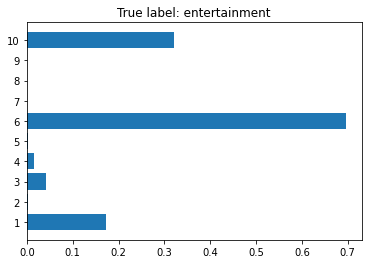

In [ ]:
i2 = np.random.choice(len(df))
z2 = Z2[i2]
topics2 = np.arange(10) + 1

fig2, ax2 = plt.subplots()
ax2.barh(topics2, z2)
ax2.set_yticks(topics2)
ax2.set_title('True label: %s' % df.iloc[i2]['labels'])
i2

In [ ]:
print(wrap(df.iloc[i2]['text']))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20